# **Proyecto Integrador Aprendizaje automático**
**Predicción de la secuencia Fibonacci**

---

Anahí Montserrat Vázquez Padilla

**Carga de librerías**

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt



*   **numpy:** Librería fundamental para trabajar con arreglos y operaciones matemáticas. Aquí se utiliza para manipular datos de entrada y salida.

*   **tensorflow:** Framework para construir y entrenar modelos de aprendizaje profundo. Incluye herramientas para definir, entrenar y evaluar redes neuronales.

*   **matplotlib.pyplot:** Librería para visualizar gráficas. Aquí se usa para graficar la pérdida durante el entrenamiento.


**Generar la secuencia de Fibonacci**

In [2]:
def generate_fibonacci_sequence(length):
    sequence = [0, 1]
    for i in range(2, length):
        sequence.append(sequence[-1] + sequence[-2])
    return sequence

Genera una lista de números de Fibonacci hasta la longitud deseada. Es base para entrenar y probar la red.

**Configuración y preparación de datos**

In [3]:
sequence_length = 20  # Longitud de la secuencia de Fibonacci
fibonacci_sequence = generate_fibonacci_sequence(sequence_length)

def create_dataset(sequence, window_size):
    X, y = [], []
    for i in range(len(sequence) - window_size):
        X.append(sequence[i:i + window_size])
        y.append(sequence[i + window_size])
    return np.array(X), np.array(y)

window_size = 3  # Número de pasos atrás para predecir el siguiente número
X, y = create_dataset(fibonacci_sequence, window_size)

# Reshape para el formato de entrada de RNN
X = X.reshape((X.shape[0], X.shape[1], 1))  # (muestras, pasos de tiempo, características)

Se preparan los datos para que puedan ser utilizados por la red neuronal. La red neuronal necesita los datos en formato supervisado: entradas (X) y salidas (y). Esto permite entrenar el modelo para aprender la relación entre las ventanas y el próximo valor.

Con una secuencia [0, 1, 1, 2, 3] y window_size = 3:

X = [[0, 1, 1], [1, 1, 2]]
y = [2, 3]

In [4]:
# Construcción del modelo RNN
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(window_size, 1)),
    Dense(1)  # Una salida para predecir el próximo número
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Capa RNN (SimpleRNN):


*   50 neuronas: La capacidad de la red para captar patrones temporales.
*   Activación relu: Ayuda a manejar la no linealidad.
1.   Forma de entrada (input_shape): El modelo recibe secuencias de 3 números (window_size) con una característica cada uno (los valores de Fibonacci).

Capa Densa (Dense):
*   1 neurona: Produce un único número como salida, que representa el siguiente valor en la secuencia.




In [5]:
# Compilación del modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenamiento con historial
history = model.fit(X, y, epochs=200, verbose=0)

Compilación:


*   Optimizador adam: Algoritmo para ajustar los pesos del modelo durante el entrenamiento.
*   Pérdida (mse): Calcula el error cuadrático medio entre las predicciones y los valores reales.
*   Métrica (mae): Error absoluto medio para evaluar la precisión.

Entrenamiento (fit):


*   Datos de entrada (X): Ventanas de valores de Fibonacci.
*   Etiquetas (y): Próximos valores de Fibonacci.
*   Épocas (epochs): Número de iteraciones completas.
*   Salida silenciosa (verbose=0): No imprime resultados intermedios.







In [6]:
# Evaluación del modelo
loss, mae = model.evaluate(X, y, verbose=0)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.781647264957428


El modelo se evalúa en los mismos datos de entrenamiento para medir el desempeño.

In [7]:
# Predicción
test_input = np.array(fibonacci_sequence[-window_size:]).reshape((1, window_size, 1))
predicted_value = model.predict(test_input, verbose=0)
print(f"Entrada: {fibonacci_sequence[-window_size:]}")  # Últimos valores de entrada
print(f"Predicción del siguiente número: {predicted_value[0][0]}")  # Predicción

Entrada: [1597, 2584, 4181]
Predicción del siguiente número: 6764.06005859375


Se utiliza el modelo para predecir el siguiente número en la secuencia.

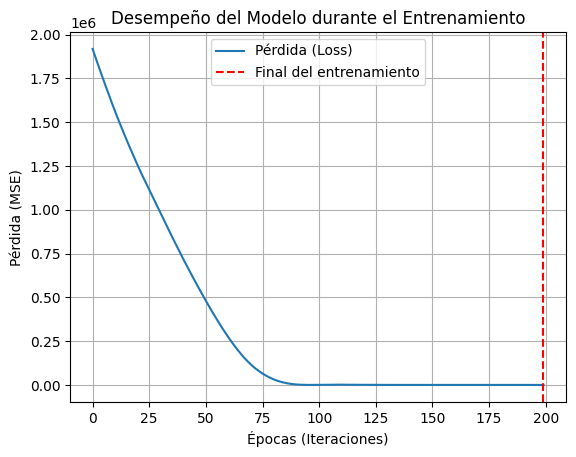

In [8]:
# Graficar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida (Loss)')
plt.title('Desempeño del Modelo durante el Entrenamiento')
plt.xlabel('Épocas (Iteraciones)')
plt.ylabel('Pérdida (MSE)')
plt.axvline(x=len(history.history['loss']) - 1, color='r', linestyle='--', label='Final del entrenamiento')
plt.legend()
plt.grid()
plt.show()

# **Resultados**

Se grafica la pérdida durante el entrenamiento.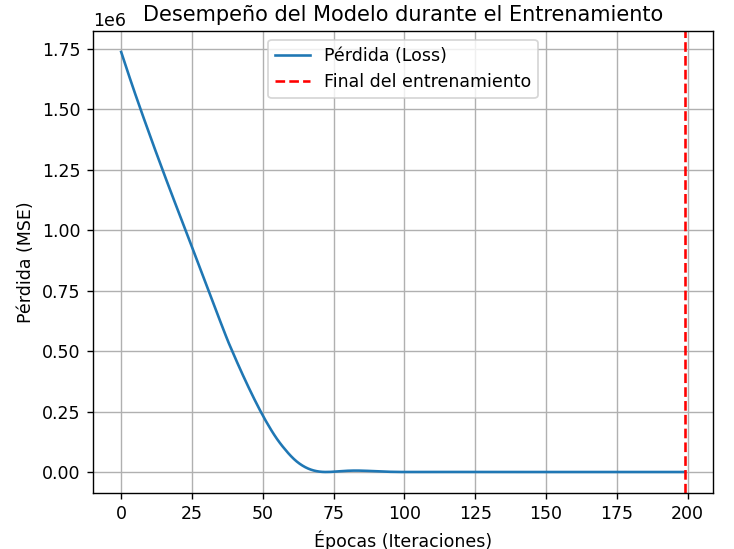

MAE: 0.7919488549232483

Entrada: [1597, 2584, 4181]

Predicción: 6764.2451171875

Valor real = 6765

# Conclusión

El programa presentado utiliza una red neuronal del tipo recurrente (RNN), diseñada específicamente para trabajar con datos secuenciales o temporales. Este tipo de red se caracteriza por su capacidad para mantener información de estados previos gracias a sus conexiones recurrentes, lo que permite analizar patrones en series de tiempo o secuencias como la de Fibonacci.

En este caso, la RNN fue implementada con la capa SimpleRNN, la cual procesa la secuencia de Fibonacci como entrada, aprendiendo las relaciones entre los valores consecutivos en la serie. La elección de una RNN es adecuada para este problema porque los números de Fibonacci dependen directamente de los valores anteriores, lo que exige un modelo que pueda "recordar" esta dependencia durante el proceso de aprendizaje.